In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from pylab import rcParams

from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [2]:
import yfinance as yf  
df = yf.download(tickers="AMD")  
df.to_csv('AMD.csv')

[*********************100%***********************]  1 of 1 completed


In [3]:
# Import data

df = pd.read_csv(r".\AMD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
2,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
3,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
4,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10910,2023-06-26,110.949997,112.550003,107.199997,107.510002,107.510002,68557000
10911,2023-06-27,108.570000,110.970001,107.080002,110.389999,110.389999,59381600
10912,2023-06-28,108.209999,111.779999,107.629997,110.169998,110.169998,67534100
10913,2023-06-29,112.070000,112.760002,109.839996,111.239998,111.239998,58347200
10914,2023-06-30,113.029999,114.690002,112.410004,113.910004,113.910004,53331900


In [5]:
df.shape

(10915, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10915 entries, 0 to 10914
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10915 non-null  object 
 1   Open       10915 non-null  float64
 2   High       10915 non-null  float64
 3   Low        10915 non-null  float64
 4   Close      10915 non-null  float64
 5   Adj Close  10915 non-null  float64
 6   Volume     10915 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 597.0+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10915.000000,10915.000000,10915.000000,10915.000000,10915.000000,1.091500e+04
mean,16.796569,17.464588,16.716612,17.093280,17.093280,1.845253e+07
std,23.229395,23.521080,22.527177,23.033073,23.033073,2.815715e+07
min,0.000000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,4.950000,5.437500,5.125000,5.300000,5.300000,1.224000e+06
50%,9.875000,10.062500,9.625000,9.875000,9.875000,6.828600e+06
75%,16.125000,16.377500,15.780000,16.070000,16.070000,2.279370e+07
max,163.279999,164.460007,156.100006,161.910004,161.910004,3.250584e+08


In [8]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
# Converting object to datetime for Date column

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [10]:
print((df['Date'].min()))
print((df['Date'].max()))

1980-03-17 00:00:00
2023-06-30 00:00:00


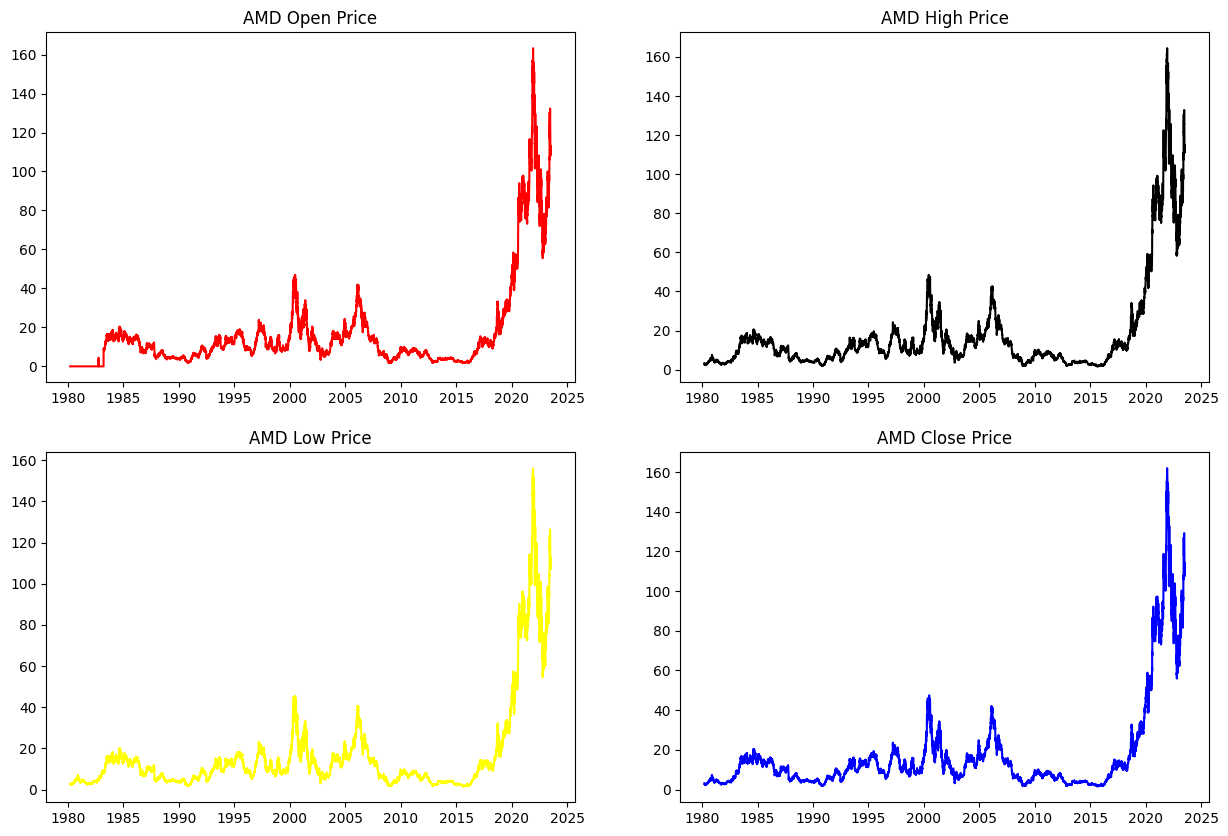

In [11]:
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(df['Date'], df['Open'], color="red")
plt.title('AMD Open Price')

plt.subplot(2, 2, 2)
plt.plot(df['Date'], df['High'], color="black")
plt.title('AMD High Price')

plt.subplot(2, 2, 3)
plt.plot(df['Date'], df['Low'], color="yellow")
plt.title('AMD Low Price')

plt.subplot(2, 2, 4)
plt.plot(df['Date'], df['Close'], color="blue")
plt.title('AMD Close Price')

plt.show()

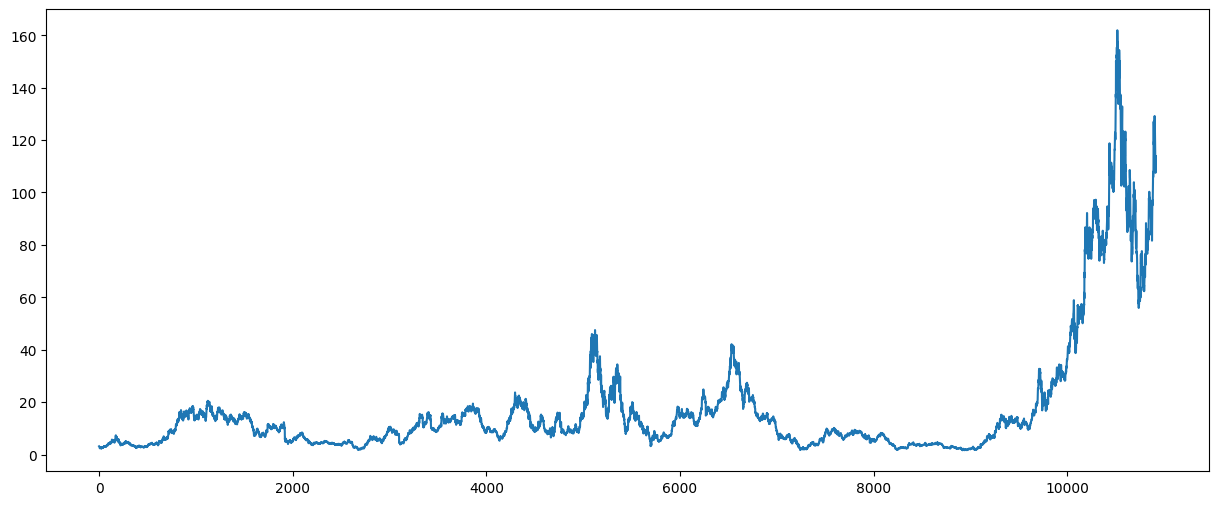

In [12]:
df['Close'].plot(figsize=(15,6))

plt.show()

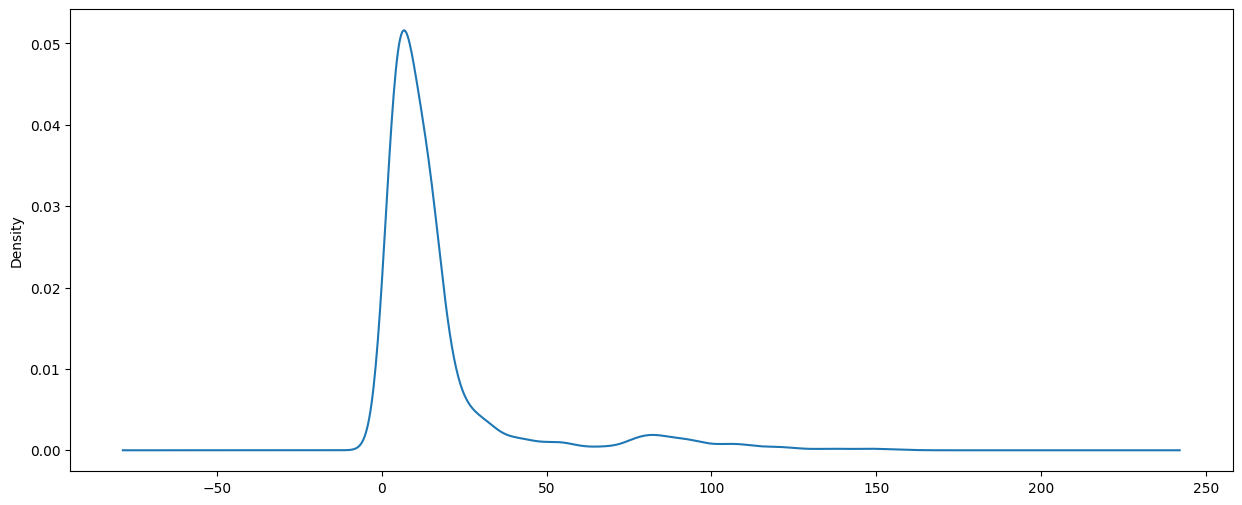

In [13]:
#Distribution of the dataset

plt.figure(figsize=(15,6))
df['Close'].plot(kind='kde')

plt.show()

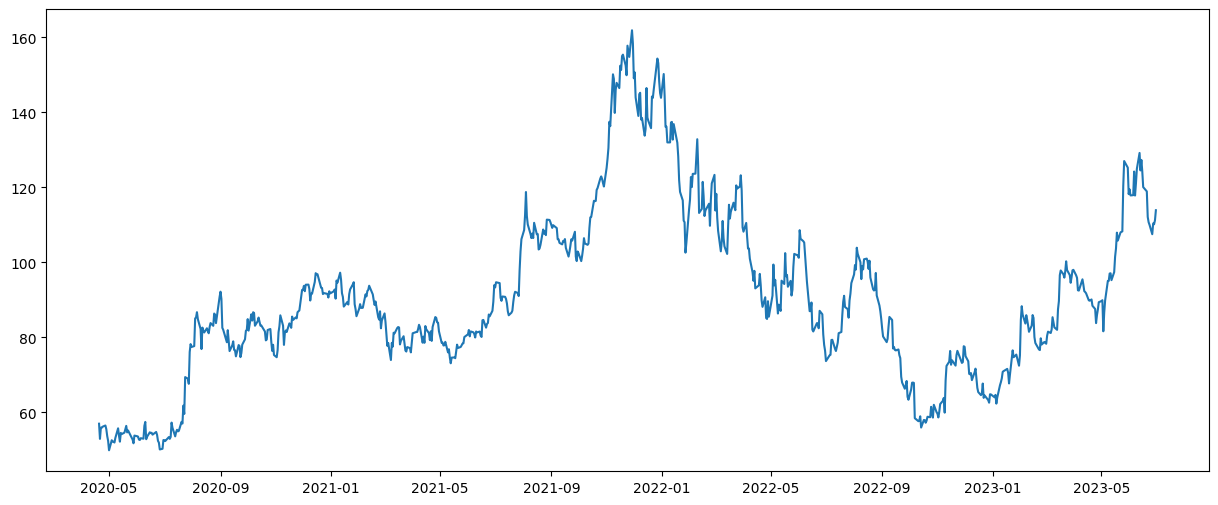

In [14]:
# Close stocks for last one year

df_lastoneyear = df[df['Date'] > '2020-04-19']

fig = plt.figure(figsize = (15,6))
plt.plot(df_lastoneyear['Date'], df_lastoneyear['Close'])

plt.show()

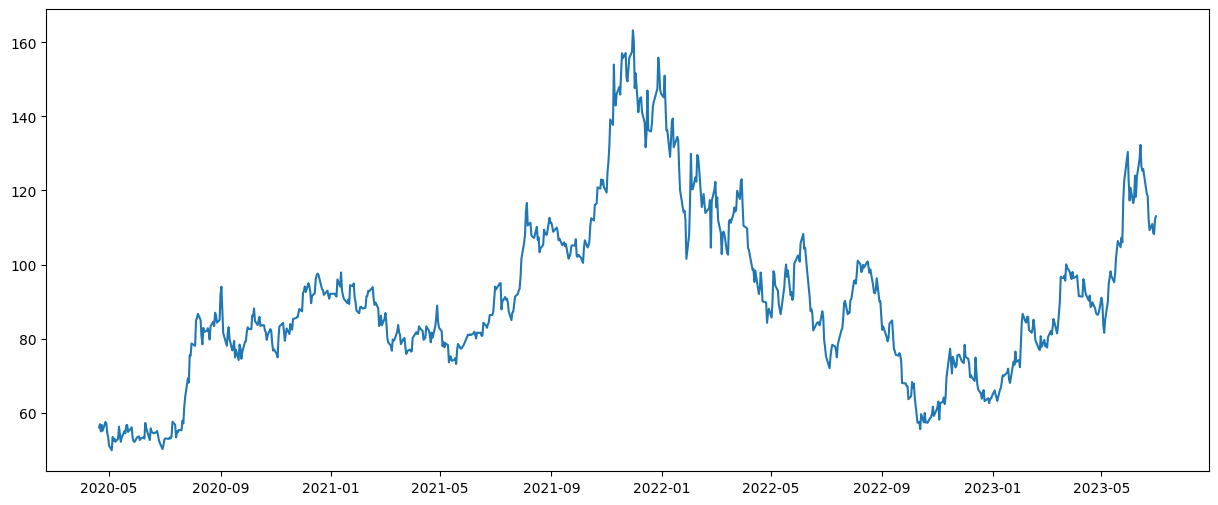

In [15]:
# Open values for last one year

plt.figure(figsize=(15,6))

plt.plot(df_lastoneyear['Date'] , df_lastoneyear['Open'])

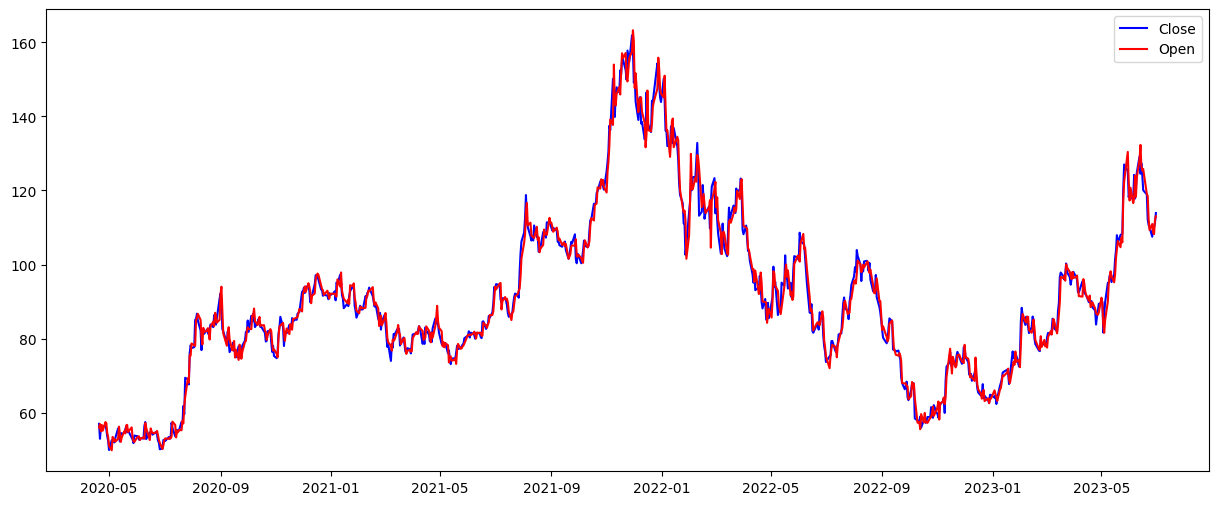

In [16]:
plt.figure(figsize = (15,6))

plt.plot(df_lastoneyear['Date'], df_lastoneyear['Close'], color = 'blue')
plt.plot(df_lastoneyear['Date'], df_lastoneyear['Open'], color = 'red')
plt.legend(["Close", "Open"])

plt.show()

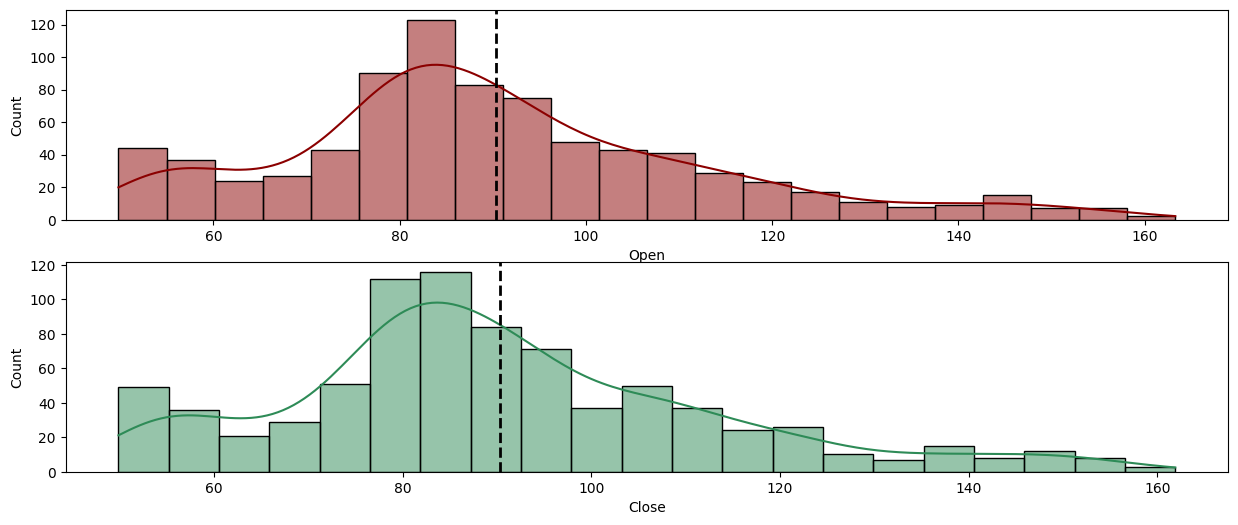

In [17]:
# Histogram for 'Open' and 'Close' for last one year data

plt.figure(figsize=(15,6))

plt.subplot(2,1,1)
sns.histplot(df_lastoneyear['Open'],color='darkred', kde=True)
plt.axvline(df_lastoneyear['Open'].mean(), color='k', linestyle='dashed', linewidth=2)

plt.subplot(2,1,2)
sns.histplot(df_lastoneyear['Close'],color='seagreen', kde=True)
plt.axvline(df_lastoneyear['Close'].mean(), color='k', linestyle='dashed', linewidth=2)

plt.show()

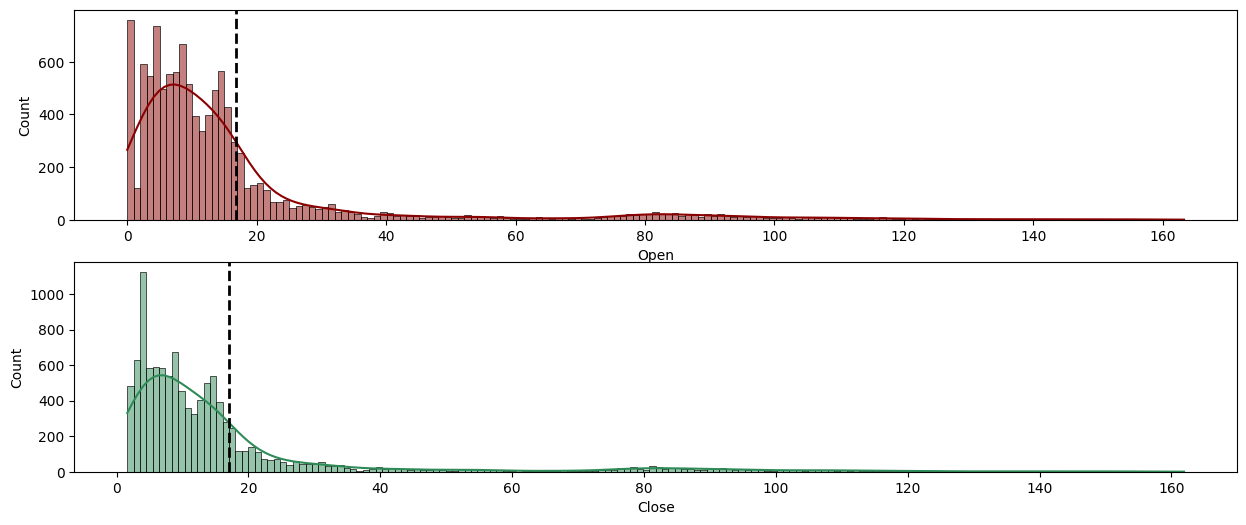

In [18]:
# Histogram for 'Close' and 'Open' on complete data

plt.figure(figsize=(15,6))

plt.subplot(2,1,1)
sns.histplot(df['Open'],color='darkred', kde=True)
plt.axvline(df['Open'].mean(), color='k', linestyle='dashed', linewidth=2)

plt.subplot(2,1,2)
sns.histplot(df['Close'],color='seagreen', kde=True)
plt.axvline(df['Close'].mean(), color='k', linestyle='dashed', linewidth=2)

plt.show()

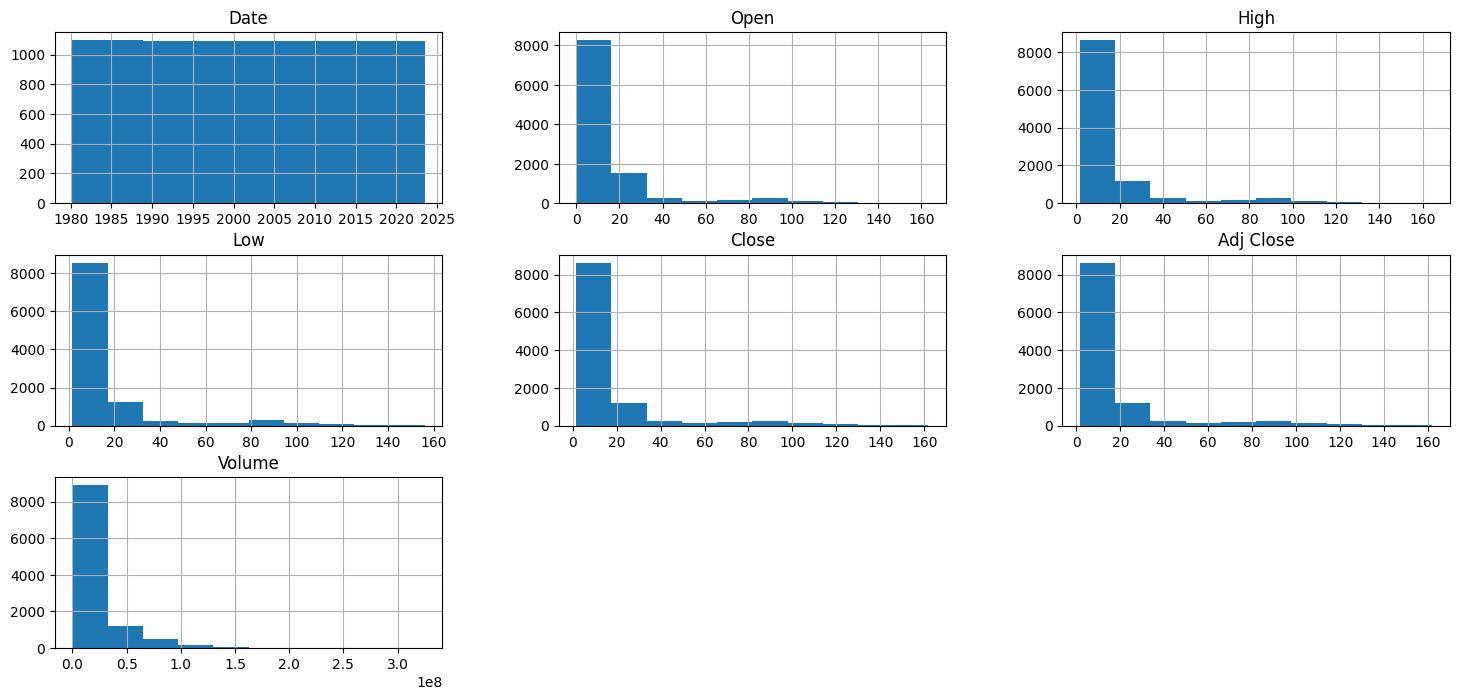

In [19]:
df.hist(figsize=(18,8))
plt.show()

In [20]:
# Setting 'date' column as index

df = df.set_index('Date')

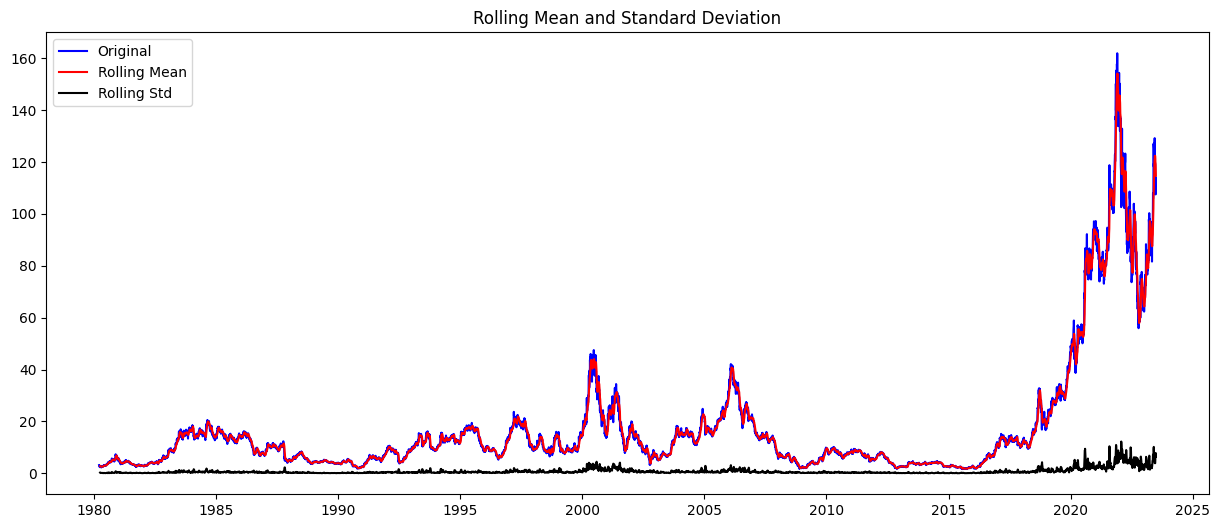

Results of dickey fuller test
Test Statistics                    0.005828
p-value                            0.959011
No. of lags used                  37.000000
Number of observations used    10877.000000
critical value (1%)               -3.430951
critical value (5%)               -2.861806
critical value (10%)              -2.566911
dtype: float64


In [21]:
#Test for stationarity

def test_stationarity(timeseries):
    # Determining rolling statistics
    rollmean = timeseries.rolling(12).mean()
    rollstd = timeseries.rolling(12).std()
    
    # Plot rolling statistics:
    plt.figure(figsize=(15,6))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rollmean, color='red', label='Rolling Mean')
    plt.plot(rollstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df['Close'])

##### p-value is greater than 0.05 and also greater than critical values indicates that our data is non-stationary

##### Making time-series stationary using log difference method

In [22]:
df_log=np.sqrt(df['Close'])
df_diff=df_log.diff().dropna()

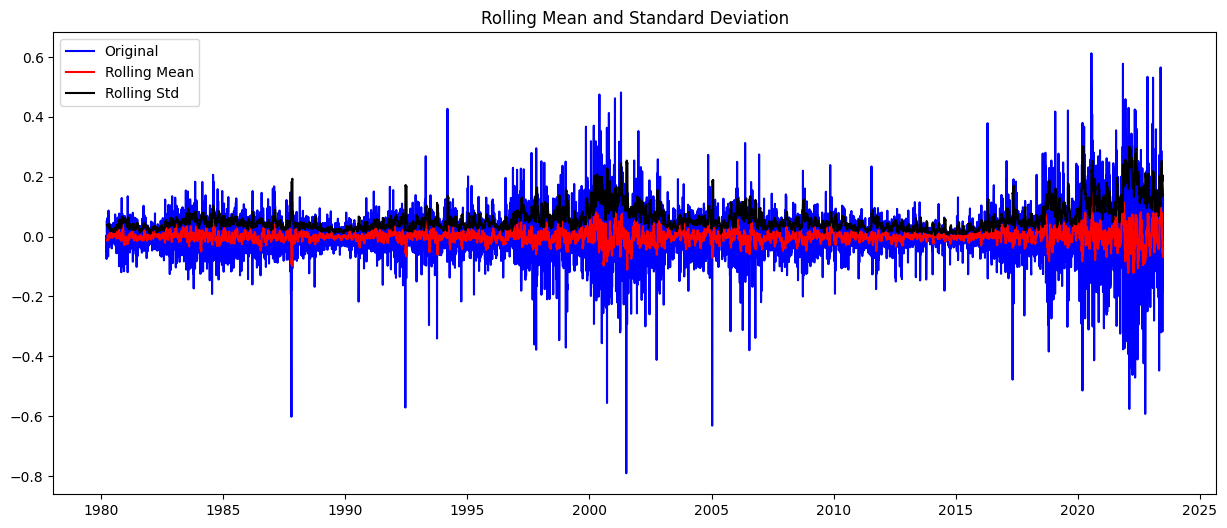

Results of dickey fuller test
Test Statistics               -1.847638e+01
p-value                        2.136301e-30
No. of lags used               3.100000e+01
Number of observations used    1.088200e+04
critical value (1%)           -3.430951e+00
critical value (5%)           -2.861806e+00
critical value (10%)          -2.566911e+00
dtype: float64


In [23]:
test_stationarity(df_diff)

In [24]:
df_diff2=df_diff.diff().dropna()

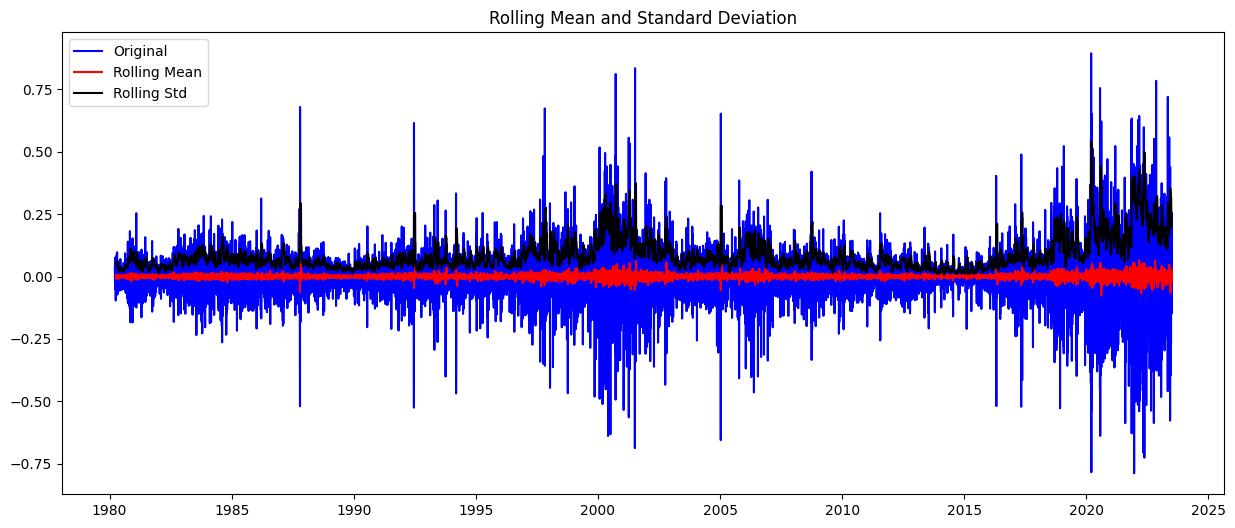

Results of dickey fuller test
Test Statistics                  -28.525351
p-value                            0.000000
No. of lags used                  38.000000
Number of observations used    10874.000000
critical value (1%)               -3.430952
critical value (5%)               -2.861806
critical value (10%)              -2.566911
dtype: float64


In [25]:
test_stationarity(df_diff2)

##### Data is now Stationary. As, p-value is less than 0.05

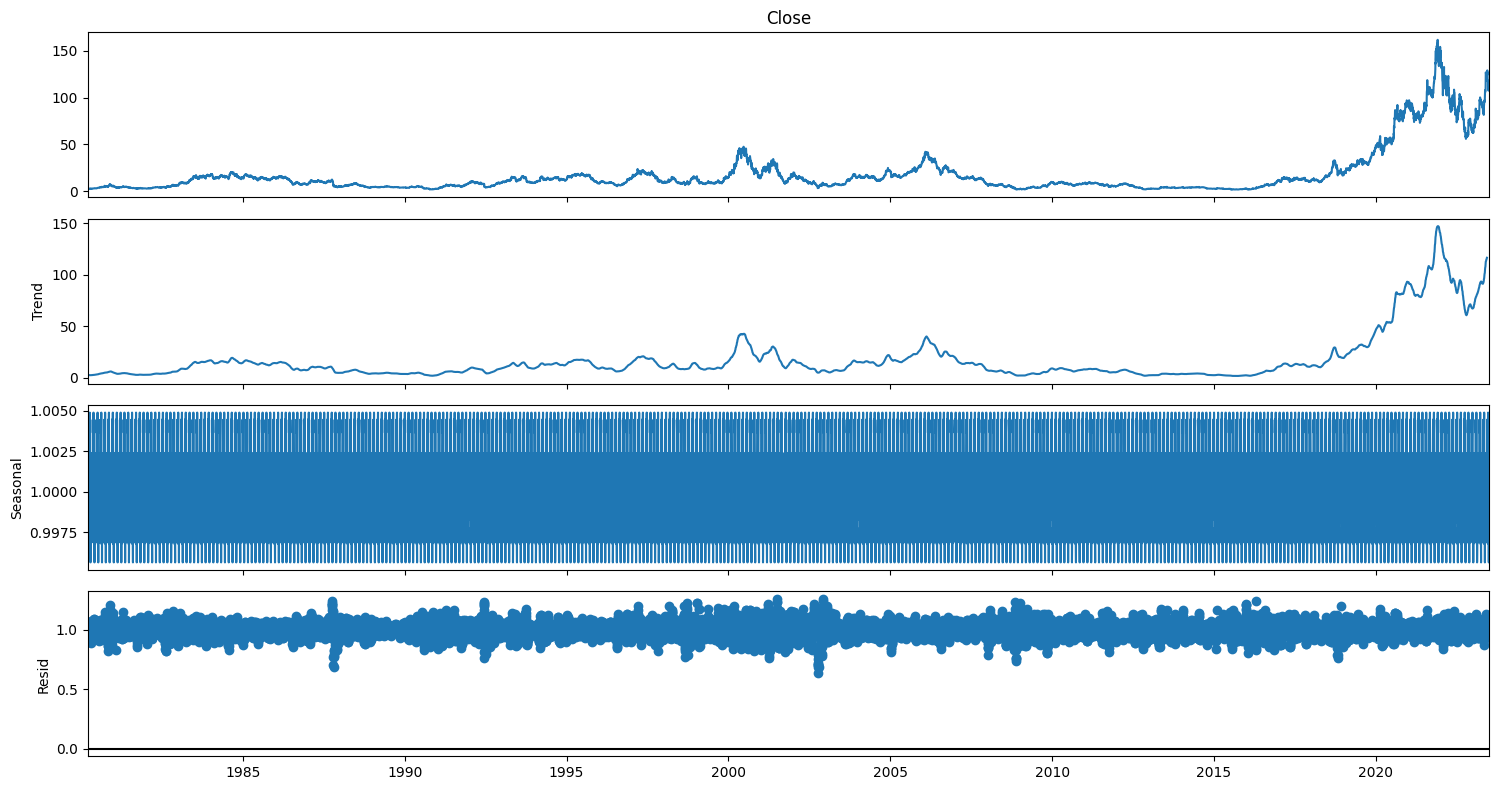

In [26]:
rcParams['figure.figsize'] = 15,8

decomposition = sm.tsa.seasonal_decompose(df['Close'], model='multiplicative', period=30)
fig = decomposition.plot()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


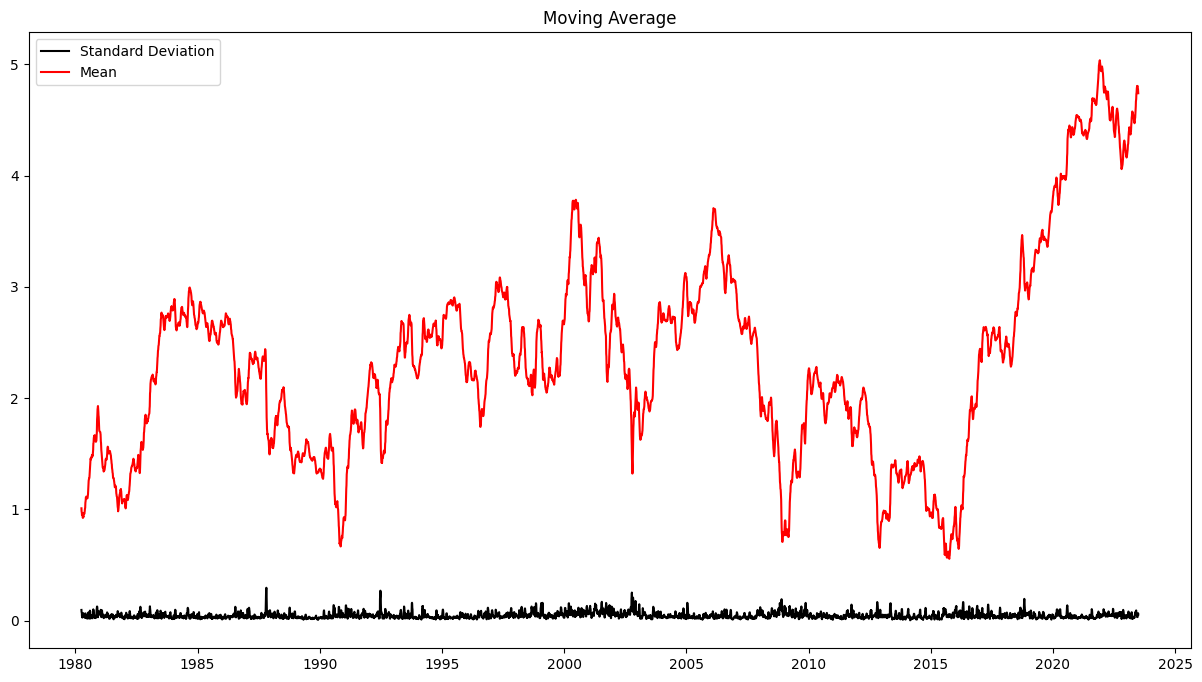

In [27]:
rcParams['figure.figsize'] = 15, 8
df_log = np.log(df['Close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

In [28]:
moving_avg.dropna()

Date
1980-04-01    1.009300
1980-04-02    0.994217
1980-04-03    0.982556
1980-04-07    0.967590
1980-04-08    0.955176
                ...   
2023-06-26    4.779155
2023-06-27    4.771473
2023-06-28    4.761002
2023-06-29    4.748536
2023-06-30    4.741108
Name: Close, Length: 10904, dtype: float64

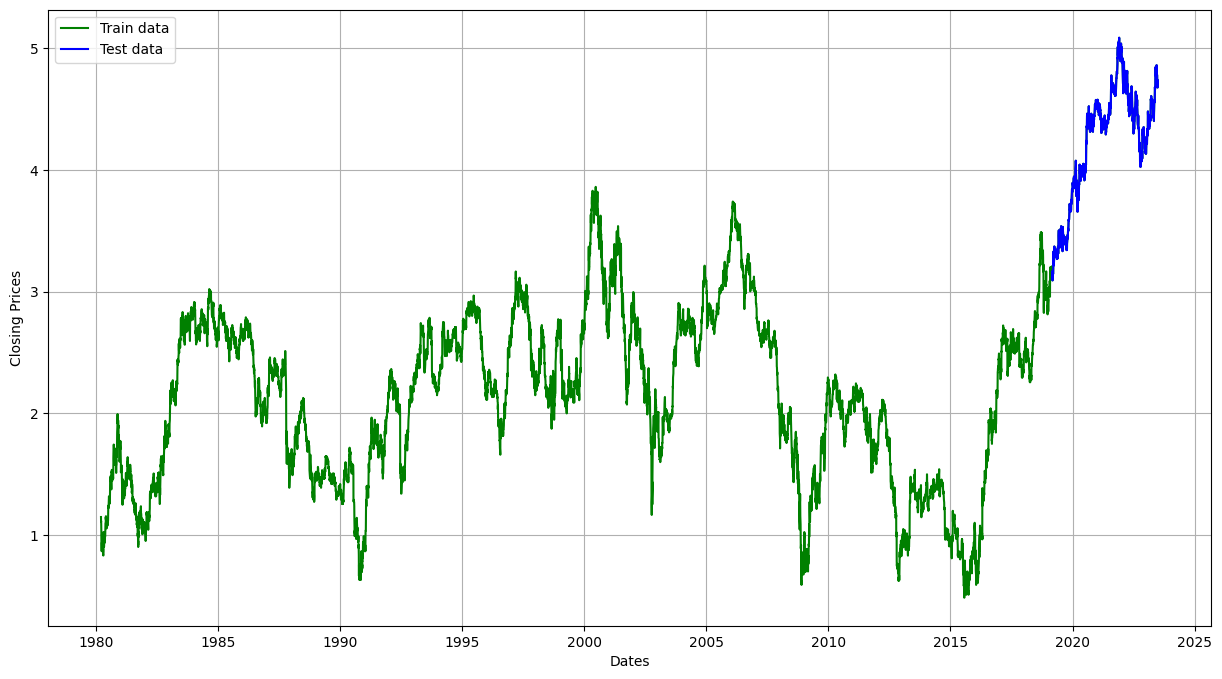

In [29]:
#split data into train and test set

train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(15, 8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

plt.show()

In [30]:
auto_arima(df_log, test='adf', seasonal=False, m=1, D=None, error_action= 'ignore', trace=True,  suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-40653.340, Time=5.81 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-40660.834, Time=1.71 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-40659.340, Time=0.70 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-40659.340, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-40661.997, Time=0.56 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-40657.340, Time=1.23 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 11.120 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [31]:
model = ARIMA(train_data, order=(0,1,0)).fit()
print(model.summary())

C:\Users\KaMal RaJiT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KaMal RaJiT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KaMal RaJiT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 9820
Model:                 ARIMA(0, 1, 0)   Log Likelihood               18187.710
Date:                Sat, 01 Jul 2023   AIC                         -36373.420
Time:                        22:44:58   BIC                         -36366.228
Sample:                             0   HQIC                        -36370.984
                               - 9820                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0014   7.93e-06    181.634      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   1.93   Jarque-Bera (JB):             53952.26
Prob(Q):                              0.17   Pr

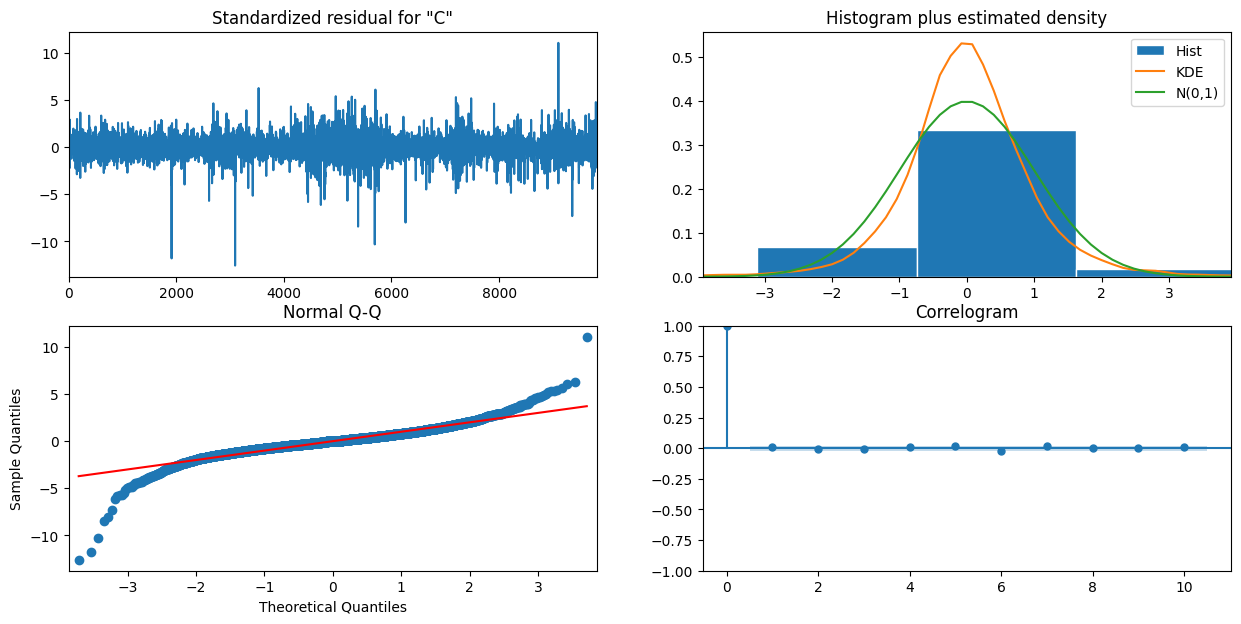

In [32]:
plt.rcParams['figure.figsize'] = (15,7)

model.plot_diagnostics()
plt.show()

### Linear Regression

In [33]:
train, test = train_test_split(df, test_size = 0.2)

In [34]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [35]:
y_train = train['Close'].values
y_test = test['Close'].values

In [36]:
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [37]:
y_pred = linear.predict(x_test)

In [38]:
result = linear.predict([[10.6875, 11.1875, 10.6875, 1545400]])
print(result)

[10.92197013]


In [39]:
df.sample()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-05-23,17.4375,17.75,17.3125,17.5625,17.5625,1914800


In [40]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 0.229
RMSE 0.479
MAE 0.238
MAPE 0.018
R2 Score :  1.0


In [41]:
test_pred = test.copy()

In [42]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
Date,,,,,,,
1992-05-11,8.875000,9.125000,8.812500,9.0625,9.0625,1196000,8.937289
2014-10-03,3.430000,3.460000,3.370000,3.4000,3.4000,16797000,3.377370
2017-06-20,12.190000,12.930000,12.180000,12.6400,12.6400,118001500,12.610690
1991-03-27,5.500000,5.500000,5.187500,5.2500,5.2500,2143000,5.287639
1986-06-25,10.625000,10.875000,10.625000,10.7500,10.7500,613600,10.722259
...,...,...,...,...,...,...,...
1993-09-03,15.562500,15.687500,14.250000,14.5000,14.5000,8231800,14.884879
2018-10-03,29.040001,29.219999,26.540001,28.4300,28.4300,190137200,27.848919
2000-02-10,21.031250,21.375000,20.656250,21.2500,21.2500,6373600,20.986239


### XGBRegressor

In [43]:
train, test = train_test_split(df, test_size = 0.2)

In [44]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [45]:
y_train = train['Close'].values
y_test = test['Close'].values

In [46]:
from xgboost import XGBRegressor

In [47]:
xgbr = XGBRegressor()
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [48]:
y_pred_xgbr = xgbr.predict(x_test)

In [49]:
result = xgbr.predict([[82.129997, 83.18, 80.389999, 39070100]])
print(result)

[81.26895]


In [50]:
df.tail(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-30,113.029999,114.690002,112.410004,113.910004,113.910004,53331900


In [51]:
print("MSE",round(mean_squared_error(y_test,y_pred_xgbr), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred_xgbr)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred_xgbr), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred_xgbr), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred_xgbr), 3))

MSE 0.326
RMSE 0.571
MAE 0.236
MAPE 0.014
R2 Score :  0.999


In [52]:
test_pred_xgbr = test.copy()

In [53]:
test_pred_xgbr['Close_Prediction_XGBReg'] = y_pred_xgbr
test_pred_xgbr

,Open,High,Low,Close,Adj Close,Volume,Close_Prediction_XGBReg
Date,,,,,,,
2023-05-25,117.309998,120.690002,115.800003,120.349998,120.349998,108514700,119.459274
2009-05-13,4.360000,4.670000,4.330000,4.380000,4.380000,35483300,4.535674
2015-10-16,2.000000,2.000000,1.890000,1.940000,1.940000,21544900,1.894798
1994-12-09,11.812500,12.062500,11.562500,11.875000,11.875000,1246200,11.843333
1983-12-28,16.562500,16.562500,16.250000,16.375000,16.375000,112000,16.376387
...,...,...,...,...,...,...,...
2009-02-27,2.080000,2.200000,2.050000,2.180000,2.180000,14342300,2.113085
2015-04-15,2.700000,2.740000,2.650000,2.700000,2.700000,15281400,2.699716
1988-05-09,7.062500,7.125000,6.562500,6.812500,6.812500,1064000,6.927579


In [54]:
test_pred_xgbr['Close_Prediction_XGBReg'] = y_pred_xgbr
test_pred_xgbr

,Open,High,Low,Close,Adj Close,Volume,Close_Prediction_XGBReg
Date,,,,,,,
2023-05-25,117.309998,120.690002,115.800003,120.349998,120.349998,108514700,119.459274
2009-05-13,4.360000,4.670000,4.330000,4.380000,4.380000,35483300,4.535674
2015-10-16,2.000000,2.000000,1.890000,1.940000,1.940000,21544900,1.894798
1994-12-09,11.812500,12.062500,11.562500,11.875000,11.875000,1246200,11.843333
1983-12-28,16.562500,16.562500,16.250000,16.375000,16.375000,112000,16.376387
...,...,...,...,...,...,...,...
2009-02-27,2.080000,2.200000,2.050000,2.180000,2.180000,14342300,2.113085
2015-04-15,2.700000,2.740000,2.650000,2.700000,2.700000,15281400,2.699716
1988-05-09,7.062500,7.125000,6.562500,6.812500,6.812500,1064000,6.927579
